In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
# Define the paths to the image folders
pumpkin_folder = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/Pumpkin'
carrot_folder = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/Carrot'
bean_folder = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/Bean'
brinjal_folder = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/Brinjal'
cabbage_folder = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/Cabbage'

In [3]:
# Define the target size for resizing
target_size = (100, 100)

In [4]:
# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith('.jpg'):
            # Read the image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            # Convert the image to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize the image
            resized_img = cv2.resize(gray_img, target_size)

            # Append the image and label to the lists
            images.append(resized_img)
            labels.append(label)

    return images, labels


In [5]:
# Load and preprocess pumpkin images (label: 0)
pumpkin_images, pumpkin_labels = load_and_preprocess_images(pumpkin_folder, 0)

100%|██████████| 1000/1000 [00:24<00:00, 40.41it/s]


In [6]:
# Load and preprocess carrot images (label: 1)
carrot_images, carrot_labels = load_and_preprocess_images(carrot_folder, 1)

100%|██████████| 1000/1000 [00:19<00:00, 51.54it/s]


In [7]:
# Load and preprocess bean images (label: 2)
bean_images, bean_labels = load_and_preprocess_images(bean_folder, 2)

100%|██████████| 1000/1000 [00:20<00:00, 48.05it/s]


In [8]:
# Load and preprocess carrot images (label: 3)
brinjal_images, brinjal_labels = load_and_preprocess_images(brinjal_folder, 3)

100%|██████████| 1000/1000 [00:22<00:00, 43.68it/s]


In [9]:
# Load and preprocess carrot images (label: 4)
cabbage_images, cabbage_labels = load_and_preprocess_images(cabbage_folder, 4)

100%|██████████| 1000/1000 [00:19<00:00, 52.59it/s]


In [10]:
# Merge the lists
all_images = pumpkin_images + carrot_images + bean_images + brinjal_images + cabbage_images
all_labels = pumpkin_labels + carrot_labels + bean_labels + brinjal_labels + cabbage_labels

In [11]:
# Convert lists to numpy arrays
x = np.array(all_images)
y = np.array(all_labels)

In [12]:
# Shuffle the data (if needed)
shuffle_indices = np.arange(x.shape[0])
np.random.shuffle(shuffle_indices)

x = x[shuffle_indices]
y = y[shuffle_indices]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

In [14]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [15]:
# Convert labels to categorical by encoding
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [16]:
# Shuffle the training data
x_train, y_train = shuffle(x_train, y_train, random_state=42)


In [17]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout layer for regularization
model.add(layers.Dense(5, activation='softmax'))  # Output layer with 5 units for multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [18]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2  # Split a portion of the training data for validation
)

Epoch 1/100
113/113 [==============================] - 14s 20ms/step - loss: 3.3405 - accuracy: 0.3894 - val_loss: 1.2933 - val_accuracy: 0.5100
Epoch 2/100
113/113 [==============================] - 1s 13ms/step - loss: 1.0959 - accuracy: 0.5731 - val_loss: 1.1752 - val_accuracy: 0.5300
Epoch 3/100
113/113 [==============================] - 1s 13ms/step - loss: 0.8971 - accuracy: 0.6528 - val_loss: 0.9236 - val_accuracy: 0.6367
Epoch 4/100
113/113 [==============================] - 1s 12ms/step - loss: 0.6321 - accuracy: 0.7733 - val_loss: 0.8278 - val_accuracy: 0.7011
Epoch 5/100
113/113 [==============================] - 1s 12ms/step - loss: 0.5337 - accuracy: 0.8083 - val_loss: 0.9138 - val_accuracy: 0.6833
Epoch 6/100
113/113 [==============================] - 1s 12ms/step - loss: 0.4438 - accuracy: 0.8347 - val_loss: 0.7607 - val_accuracy: 0.7533
Epoch 7/100
113/113 [==============================] - 1s 12ms/step - loss: 0.3684 - accuracy: 0.8683 - val_loss: 0.7743 - val_accuracy

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

16/16 [==============================] - 0s 8ms/step - loss: 1.1687 - accuracy: 0.8500
Test Accuracy: 0.8500000238418579


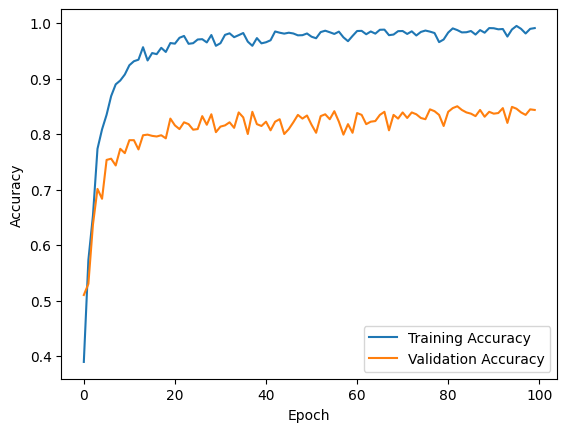

In [20]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Testing of the model with random images**

In [31]:
# Path to the new image (replace with the actual path)
new_image_path1 = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/0118.jpg'
new_image_path2 = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/1142.jpg'
new_image_path3 = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/1113.jpg'

In [47]:
image1=cv2.imread(new_image_path1)

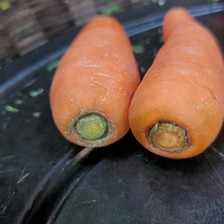

In [48]:
from google.colab.patches import cv2_imshow
cv2_imshow(image1)

In [49]:
image2=cv2.imread(new_image_path2)

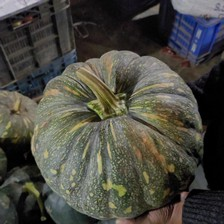

In [50]:
from google.colab.patches import cv2_imshow
cv2_imshow(image2)

In [51]:
image3=cv2.imread(new_image_path3)

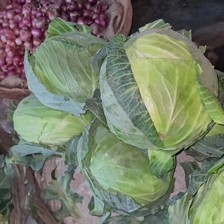

In [52]:
from google.colab.patches import cv2_imshow
cv2_imshow(image3)

In [22]:
# Load and preprocess a new image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (100, 100))
    return resized_img.reshape((1, 100, 100, 1))

In [36]:
# Preprocess the image
new_image1 = preprocess_image(new_image_path1)

In [37]:
# Make predictions using the trained model
predictions = model.predict(new_image1)


1/1 [==============================] - 0s 19ms/step


In [38]:
# Interpret the predictions
class_labels = ['Pumpkin', 'Carrot','Bean','Brinjal','Cabbage']
predicted_class = np.argmax(predictions)
print(predicted_class)
print(f'The model predicts that the image is a {class_labels[predicted_class]}')

1
The model predicts that the image is a Carrot


In [39]:
# Preprocess the image
new_image2 = preprocess_image(new_image_path2)

In [40]:
# Make predictions using the trained model
predictions = model.predict(new_image2)

1/1 [==============================] - 0s 17ms/step


In [41]:
# Interpret the predictions
class_labels = ['Pumpkin', 'Carrot','Bean','Brinjal','Cabbage']
predicted_class = np.argmax(predictions)
print(predicted_class)
print(f'The model predicts that the image is a {class_labels[predicted_class]}')

0
The model predicts that the image is a Pumpkin


In [42]:
# Preprocess the image
new_image3 = preprocess_image(new_image_path3)

In [43]:
# Make predictions using the trained model
predictions = model.predict(new_image3)

1/1 [==============================] - 0s 18ms/step


In [44]:
# Interpret the predictions
class_labels = ['Pumpkin', 'Carrot','Bean','Brinjal','Cabbage']
predicted_class = np.argmax(predictions)
print(predicted_class)
print(f'The model predicts that the image is a {class_labels[predicted_class]}')

4
The model predicts that the image is a Cabbage
